In [287]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization

RANDOM_SEED = 42

# Specify each path

In [288]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [289]:
NUM_CLASSES = 11

# Dataset reading

In [290]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [291]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [293]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dense(256, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [294]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 256)               11008     
                                                                 
 batch_normalization_12 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_42 (Dropout)        (None, 256)               0         
                                                                 
 dense_56 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_13 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_43 (Dropout)        (None, 128)             

In [295]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [296]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [297]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


1/3 [=========>....................] - ETA: 3s - loss: 3.5587 - accuracy: 0.1328
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 2s 167ms/step - loss: 3.4709 - accuracy: 0.1018 - val_loss: 2.3632 - val_accuracy: 0.1789
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.9398 - accuracy: 0.1484
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 3.1080 - accuracy: 0.1404 - val_loss: 2.3410 - val_accuracy: 0.2316
Epoch 3/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.7900 - accuracy: 0.1562

C:\Users\Cristina\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 2.8249 - accuracy: 0.1333 - val_loss: 2.3200 - val_accuracy: 0.2526
Epoch 4/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.6767 - accuracy: 0.2266
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 50ms/step - loss: 2.6278 - accuracy: 0.1860 - val_loss: 2.2976 - val_accuracy: 0.2421
Epoch 5/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.4762 - accuracy: 0.2969
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 50ms/step - loss: 2.4532 - accuracy: 0.2737 - val_loss: 2.2749 - val_accuracy: 0.3053
Epoch 6/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.4454 - accuracy: 0.2344
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [========================

In [298]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 46ms/step - loss: 0.1428 - accuracy: 0.9368


In [299]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [300]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 143ms/step
[4.2276562e-05 6.3606394e-06 8.0386584e-05 4.9270515e-04 4.6045811e-06
 2.3348506e-04 1.5633024e-05 6.4641522e-04 9.9842286e-01 4.5266381e-05
 1.0003093e-05]
8


# Confusion matrix

3/3 [==============================] - 0s 3ms/step


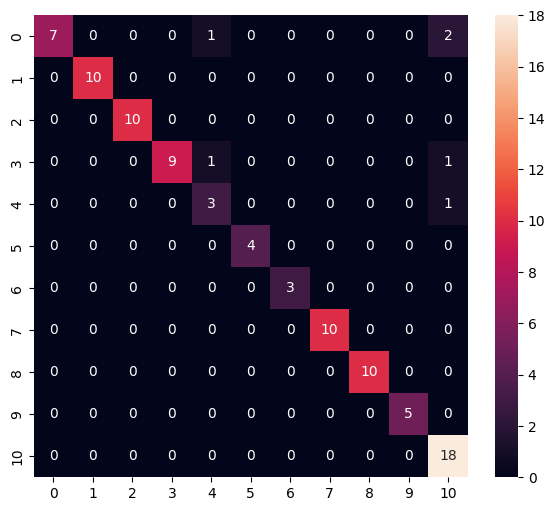

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      0.82      0.90        11
           4       0.60      0.75      0.67         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         5
          10       0.82      1.00      0.90        18

    accuracy                           0.94        95
   macro avg       0.95      0.93      0.94        95
weighted avg       0.95      0.94      0.94        95



In [301]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [302]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Cristina\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [303]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Cristina\AppData\Local\Temp\tmp5q3mc9t_\assets


INFO:tensorflow:Assets written to: C:\Users\Cristina\AppData\Local\Temp\tmp5q3mc9t_\assets


60000

# Inference test

In [304]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [305]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [306]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [307]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [308]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.1328018e-05 6.2371396e-06 7.9176803e-05 4.8257230e-04 4.4698704e-06
 2.2151893e-04 1.5136758e-05 6.4173498e-04 9.9845374e-01 4.4435175e-05
 9.6598396e-06]
8
